## Multiple linear regression model for the prediction of demand for shared bikes
### Case Study
Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Essentially, the company wants —

    


To understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    -> Which variables are significant in predicting the demand for shared bikes.
    -> How well those variables describe the bike demands

So interpretation is important!

In [441]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data

In [442]:
#read csv data file
df = pd.read_csv("datast/day.csv")

In [443]:
# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not.
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [444]:
#check shape
df.shape

(730, 16)

In [445]:
# convert column name according to data dictionary to understan easily 
df = df.rename(columns={'dteday':'date',
                       'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'atemp':'temp_celcius',
                       'hum':'humidity',
                       'cnt':'count'})
#again compare shape
df.shape

(730, 16)

In [446]:
#check null values
df.isnull().sum()

instant         0
date            0
season          0
year            0
month           0
holiday         0
weekday         0
workingday      0
weather         0
temp            0
temp_celcius    0
humidity        0
windspeed       0
casual          0
registered      0
count           0
dtype: int64

In [447]:
#Check Unique values to variety no. of season, day, year and month etc
df.apply(lambda x: len(x.unique()))

instant         730
date            730
season            4
year              2
month            12
holiday           2
weekday           7
workingday        2
weather           3
temp            498
temp_celcius    689
humidity        594
windspeed       649
casual          605
registered      678
count           695
dtype: int64

In [448]:
#take information about data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       730 non-null    int64  
 1   date          730 non-null    object 
 2   season        730 non-null    int64  
 3   year          730 non-null    int64  
 4   month         730 non-null    int64  
 5   holiday       730 non-null    int64  
 6   weekday       730 non-null    int64  
 7   workingday    730 non-null    int64  
 8   weather       730 non-null    int64  
 9   temp          730 non-null    float64
 10  temp_celcius  730 non-null    float64
 11  humidity      730 non-null    float64
 12  windspeed     730 non-null    float64
 13  casual        730 non-null    int64  
 14  registered    730 non-null    int64  
 15  count         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [449]:
df.describe()

,instant,season,year,month,holiday,weekday,workingday,weather,temp,temp_celcius,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Visualisation

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [450]:
# as we can see instant,date are not useful
df = df.drop(columns = ['instant' , 'date','temp','temp_celcius','humidity','windspeed'])

In [451]:
# int cols -> category:
cols = ['season', 'year', 'month' , 'holiday' , 'weekday' , 'workingday' , 'weather']
for col in cols:
    df[col] = df[col].astype('category')

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    category
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weather     730 non-null    category
 7   casual      730 non-null    int64   
 8   registered  730 non-null    int64   
 9   count       730 non-null    int64   
dtypes: category(7), int64(3)
memory usage: 23.7 KB


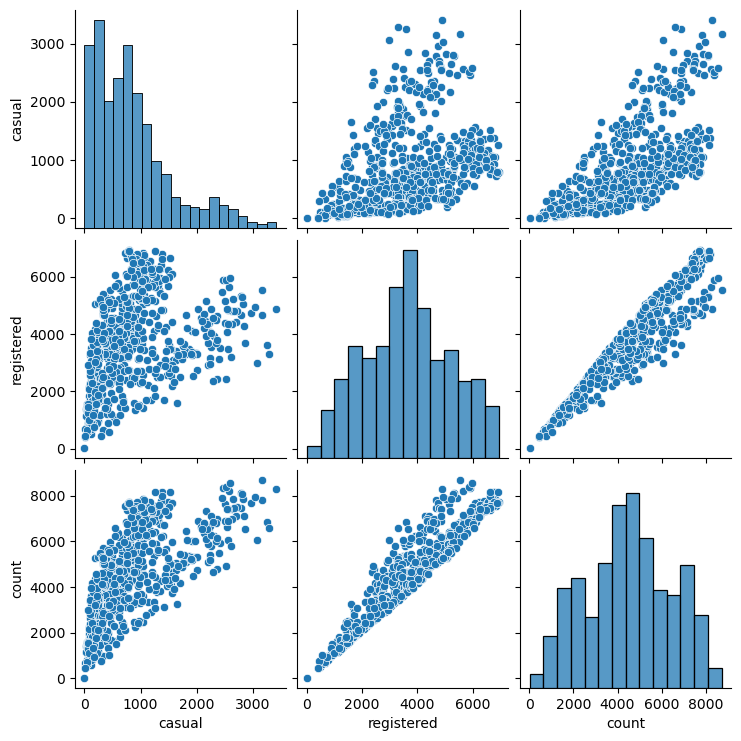

In [453]:
sns.pairplot(df)
plt.show()

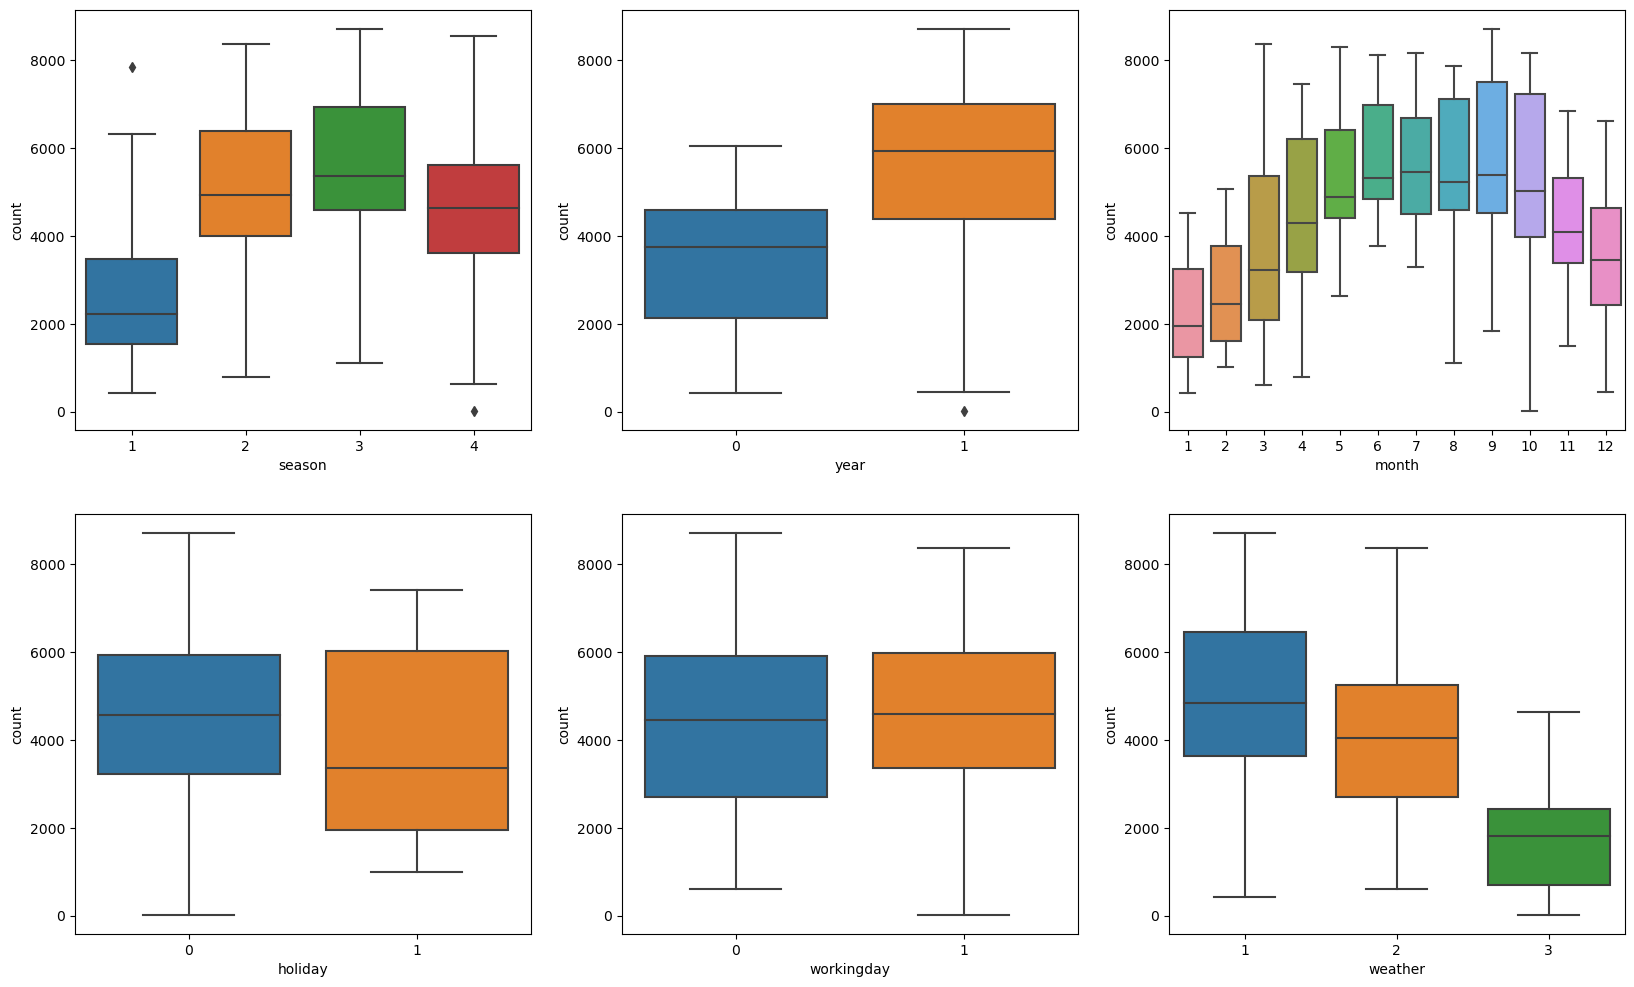

In [454]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'year', y = 'count', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'month', y = 'count', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'count', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weather', y = 'count', data = df)
plt.show()

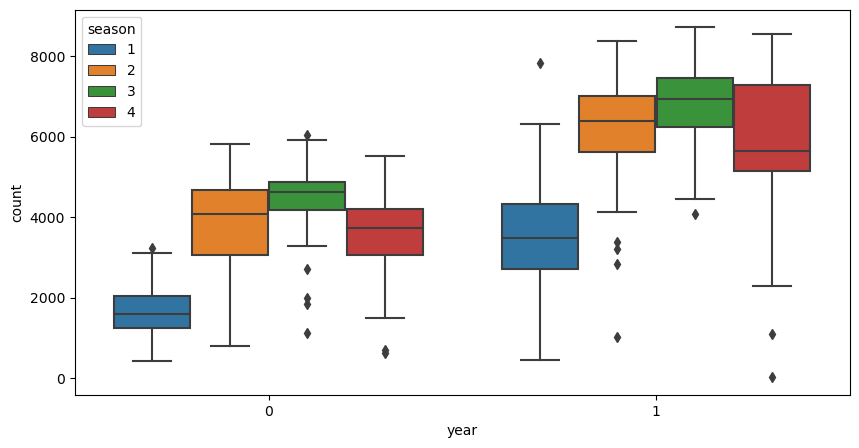

In [455]:
#Effects of season per year on booking
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'year', y = 'count', hue = 'season', data = df)
plt.show()

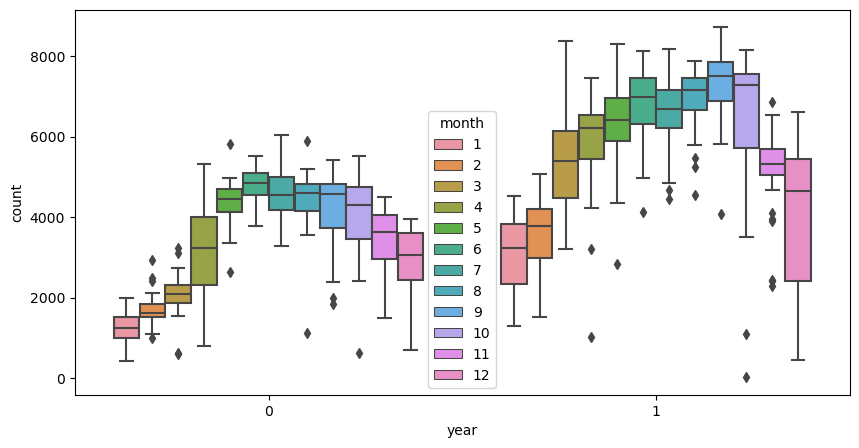

In [456]:
#Effect of months on booking
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'year', y = 'count', hue = 'month', data = df)
plt.show()

In [457]:
# Check the head of the dataset
df.head()

,season,year,month,holiday,weekday,workingday,weather,casual,registered,count
0,1,0,1,0,6,0,2,331,654,985
1,1,0,1,0,0,0,2,131,670,801
2,1,0,1,0,1,1,1,120,1229,1349
3,1,0,1,0,2,1,1,108,1454,1562
4,1,0,1,0,3,1,1,82,1518,1600


In [458]:
df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)
df['year'].replace({0: '2018', 1: '2019'}, inplace=True)
df.head()

,season,year,month,holiday,weekday,workingday,weather,casual,registered,count
0,Spring,2018,1,0,6,0,2,331,654,985
1,Spring,2018,1,0,0,0,2,131,670,801
2,Spring,2018,1,0,1,1,1,120,1229,1349
3,Spring,2018,1,0,2,1,1,108,1454,1562
4,Spring,2018,1,0,3,1,1,82,1518,1600


### Dummy Variables

In [459]:
# Get the dummy variables for the feature  and store it in a new variable - 'status'
status = pd.get_dummies(df, columns=['year', 'season'],drop_first=True)
status.head()

,month,holiday,weekday,workingday,weather,casual,registered,count,year_2019,season_Summer,season_Fall,season_Winter
0,1,0,6,0,2,331,654,985,0,0,0,0
1,1,0,0,0,2,131,670,801,0,0,0,0
2,1,0,1,1,1,120,1229,1349,0,0,0,0
3,1,0,2,1,1,108,1454,1562,0,0,0,0
4,1,0,3,1,1,82,1518,1600,0,0,0,0


## Split in to train test data

In [460]:
# Check what the dataset 'status' looks like
status.head()

,month,holiday,weekday,workingday,weather,casual,registered,count,year_2019,season_Summer,season_Fall,season_Winter
0,1,0,6,0,2,331,654,985,0,0,0,0
1,1,0,0,0,2,131,670,801,0,0,0,0
2,1,0,1,1,1,120,1229,1349,0,0,0,0
3,1,0,2,1,1,108,1454,1562,0,0,0,0
4,1,0,3,1,1,82,1518,1600,0,0,0,0


In [461]:
#df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
df_train, df_test = train_test_split(status, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)


(510, 12)
(219, 12)


### Rescaling the features

In [462]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
#num_vars = ['month', 'weekday', 'casual','registered']
num_vars = ['weather', 'month' ,'casual','registered','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


,month,holiday,weekday,workingday,weather,casual,registered,count,year_2019,season_Summer,season_Fall,season_Winter
653,0.818182,0,2,1,0.0,0.280402,0.951776,0.864243,1,0,0,1
576,0.545455,0,2,1,0.0,0.294422,0.899220,0.827658,1,0,1,0
426,0.181818,0,6,0,0.5,0.290765,0.446145,0.465255,1,0,0,0
728,1.000000,0,0,0,0.0,0.110332,0.203869,0.204096,1,0,0,0
482,0.272727,0,6,0,0.5,0.340750,0.444701,0.482973,1,1,0,0


In [508]:
df_train.describe()

,month,weather,casual,registered,year_2019,season_Summer,season_Fall,season_Winter
count,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.504456,0.20098,0.254661,0.523944,0.507843,0.245098,0.262745,0.24902
std,0.315338,0.27377,0.206011,0.228175,0.500429,0.430568,0.440557,0.43287
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.181818,0.00000,0.094179,0.353487,0.000000,0.000000,0.000000,0.00000
50%,0.545455,0.00000,0.212740,0.525123,1.000000,0.000000,0.000000,0.00000
75%,0.818182,0.50000,0.327415,0.696073,1.000000,0.000000,1.000000,0.00000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


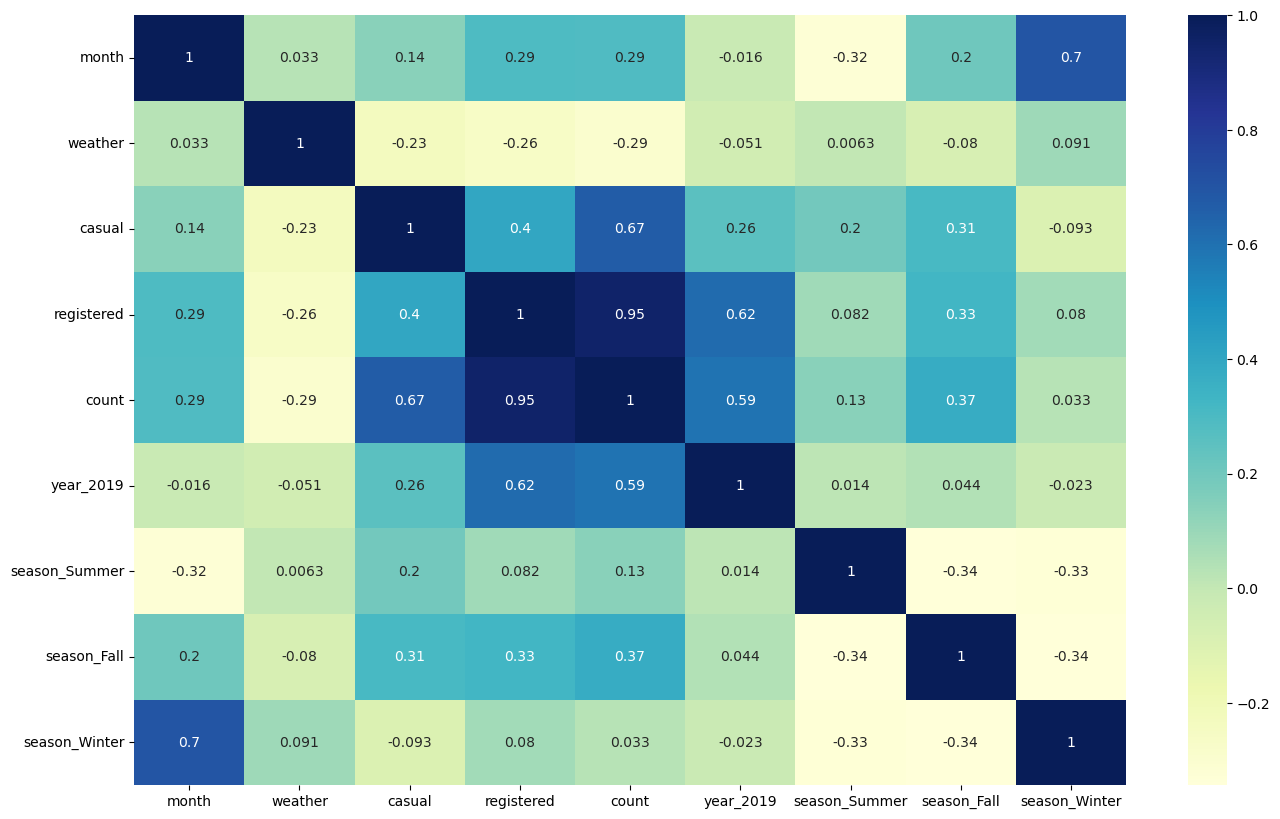

In [464]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [506]:
df_train.head()


,month,holiday,weekday,workingday,weather,casual,registered,year_2019,season_Summer,season_Fall,season_Winter
653,0.818182,0,2,1,0.0,0.280402,0.951776,1,0,0,1
576,0.545455,0,2,1,0.0,0.294422,0.899220,1,0,1,0
426,0.181818,0,6,0,0.5,0.290765,0.446145,1,0,0,0
728,1.000000,0,0,0,0.0,0.110332,0.203869,1,0,0,0
482,0.272727,0,6,0,0.5,0.340750,0.444701,1,1,0,0


## Building a linear model

In [466]:
# Split the DataFrame into features (X) and target variable (y)
y_train = df_train.pop('count')
X_train = df_train

In [467]:
print(X_train)

        month holiday weekday workingday  weather    casual  registered  \
653  0.818182       0       2          1      0.0  0.280402    0.951776   
576  0.545455       0       2          1      0.0  0.294422    0.899220   
426  0.181818       0       6          0      0.5  0.290765    0.446145   
728  1.000000       0       0          0      0.0  0.110332    0.203869   
482  0.272727       0       6          0      0.5  0.340750    0.444701   
..        ...     ...     ...        ...      ...       ...         ...   
526  0.454545       0       1          1      0.5  0.309357    0.812446   
578  0.636364       0       4          1      0.0  0.298994    0.903552   
53   0.090909       0       3          1      0.0  0.041756    0.253826   
350  1.000000       0       6          0      0.5  0.083206    0.352873   
79   0.181818       0       1          1      0.5  0.121609    0.239099   

     year_2019  season_Summer  season_Fall  season_Winter  
653          1              0          

In [468]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['registered']])

# Create a fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [469]:
# Check the parameters obtained
lr.params

const         0.024532
registered    0.933473
dtype: float64

In [470]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     4541.
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.75e-255
Time:                        18:23:36   Log-Likelihood:                 624.12
No. Observations:                 510   AIC:                            -1244.
Df Residuals:                     508   BIC:                            -1236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0245      0.008      3.099      0.0

#### Adding varable one by one

In [471]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['weather']])

# Create a fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     47.47
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.66e-11
Time:                        18:23:36   Log-Likelihood:                 61.289
No. Observations:                 510   AIC:                            -118.6
Df Residuals:                     508   BIC:                            -110.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5618      0.012     47.555      0.0

In [472]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['year_2019']])

# Create a fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     273.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.89e-49
Time:                        18:23:36   Log-Likelihood:                 148.31
No. Observations:                 510   AIC:                            -292.6
Df Residuals:                     508   BIC:                            -284.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3788      0.011     33.108      0.0

#### Adding all variable

In [473]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const           -8.326673e-16
month           -5.898060e-17
holiday         -5.308254e-16
weekday         -3.417405e-16
workingday       2.220446e-16
weather          3.677614e-16
casual           3.774735e-01
registered       7.968247e-01
year_2019       -8.933826e-17
season_Summer   -1.249001e-16
season_Fall     -2.428613e-16
season_Winter   -7.979728e-17
dtype: float64

In [474]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.015e+29
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:23:36   Log-Likelihood:                 16655.
No. Observations:                 510   AIC:                        -3.329e+04
Df Residuals:                     498   BIC:                        -3.323e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.327e-16   2.76e-16     -3.021

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [475]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [476]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,registered,36.67
0,month,12.70
3,workingday,8.76
10,season_Winter,7.75
5,casual,7.55
9,season_Fall,5.85
7,year_2019,5.29
8,season_Summer,3.47
2,weekday,2.94
4,weather,1.84


#### A VIF of inf means that there is perfect multicollinearity, 
#### meaning that one or more of the independent variables can be expressed as a linear combination of the others.

In [477]:
#X = X_train.drop('year_2019' ,axis=1)
X = X_train.drop(columns = ['year_2019'])

In [478]:
X_train_lm = sm.add_constant(X)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.747e+28
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:23:36   Log-Likelihood:                 15740.
No. Observations:                 510   AIC:                        -3.146e+04
Df Residuals:                     499   BIC:                        -3.141e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.967e-16   1.66e-15     -0.360

In [479]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,registered,16.38
0,month,12.60
3,workingday,7.45
5,casual,7.42
9,season_Winter,7.28
8,season_Fall,5.12
7,season_Summer,3.06
2,weekday,2.89
4,weather,1.62
1,holiday,1.06


In [480]:
XX = X_train.drop(columns = ['year_2019' ,'season_Winter' , 'season_Fall' ,'season_Summer'])

In [481]:
X_train_lm = sm.add_constant(XX)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.215e+29
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:23:36   Log-Likelihood:                 16343.
No. Observations:                 510   AIC:                        -3.267e+04
Df Residuals:                     502   BIC:                        -3.264e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.082e-16   4.92e-16     -0.423      0.6

In [482]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = XX.columns
vif['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,registered,15.88
3,workingday,6.69
5,casual,5.74
0,month,3.80
2,weekday,2.82
4,weather,1.57
1,holiday,1.05


In [483]:
XXX = X_train.drop(columns = ['year_2019' ,'season_Winter' ,
                        'season_Fall' ,'season_Summer','weekday'])

In [484]:
X_train_lm = sm.add_constant(XXX)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.000e+32
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:23:36   Log-Likelihood:                 17875.
No. Observations:                 510   AIC:                        -3.574e+04
Df Residuals:                     503   BIC:                        -3.571e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.596e-16   2.27e-17      7.026      0.0

In [485]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = XXX.columns
vif['VIF'] = [variance_inflation_factor(XXX.values, i) for i in range(XXX.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,registered,15.88
2,workingday,6.39
4,casual,5.41
0,month,3.76
3,weather,1.51
1,holiday,1.05


In [512]:
X4 = X_train.drop(columns = ['year_2019' ,'season_Winter' ,
                        'season_Fall' ,'season_Summer','weekday' ,'registered'])

In [487]:
X_train_lm = sm.add_constant(X4)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.000e+32
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:27:51   Log-Likelihood:                 17875.
No. Observations:                 510   AIC:                        -3.574e+04
Df Residuals:                     503   BIC:                        -3.571e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.596e-16   2.27e-17      7.026      0.0

In [513]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,month,3.23
2,workingday,2.07
4,casual,2.00
3,weather,1.45
1,holiday,1.05


In [489]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X4)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [490]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     290.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.86e-146
Time:                        18:23:36   Log-Likelihood:                 384.14
No. Observations:                 510   AIC:                            -756.3
Df Residuals:                     504   BIC:                            -730.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0300      0.018      1.693      0.0

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [491]:
y_train_count = lr_4.predict(X_train_lm)
len(y_train_count)

510

Text(0.5, 0, 'Errors')

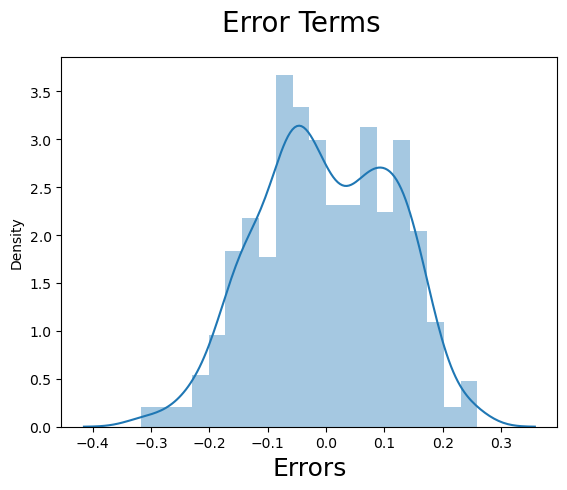

In [492]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

## Scaling

In [493]:
num_vars = ['weather', 'month' ,'casual','registered','count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [494]:
df_test.describe()

,month,weather,casual,registered,count,year_2019,season_Summer,season_Fall,season_Winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.497717,0.187215,0.266372,0.527146,0.520592,0.479452,0.264840,0.246575,0.232877
std,0.311080,0.269422,0.217246,0.217921,0.218435,0.500722,0.442259,0.432005,0.423633
min,0.000000,0.000000,0.002133,0.059486,0.048205,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.000000,0.101951,0.359154,0.377531,0.000000,0.000000,0.000000,0.000000
50%,0.454545,0.000000,0.223712,0.526567,0.524275,0.000000,0.000000,0.000000,0.000000
75%,0.727273,0.500000,0.362085,0.664742,0.672745,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.038708,0.985273,0.963300,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [495]:
y_test = df_test.pop('count')
X_test = df_test

In [496]:
len(y_test)
len(X_test)

219

In [497]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [498]:
len(X_test_m4)

219

In [499]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4
#X_test_m4 = X_test_m4.drop(["month", "holiday", "workingday" ,'weather' ,'casual'], axis = 1)
X_test_m4 = X_test_m4.drop(['year_2019' ,'season_Winter' ,
                        'season_Fall' ,'season_Summer' ,'weekday'], axis=1)

In [500]:
len(X_test_m4)

219

from sklearn.linear_model import LinearRegression
import numpy as np

# Create some sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8, 10])

# Create a linear regression model and fit the data
model = LinearRegression()
model.fit(X, y)

# Predict the output for a new input
X_new = np.array([[6]])
y_new = model.predict(X_new)

print(y_new)

In [517]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_test_m4, y_test)
y_pred_m4 = model.predict(X_test_m4)
len(y_pred_m4)

219

## Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

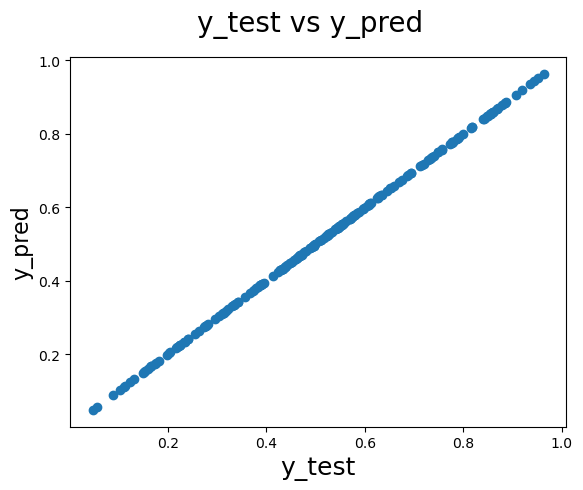

In [516]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_new)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [519]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

1.0